In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman')

In [87]:
L=480e-6
H=100e-6
Tref=773

In [84]:
fieldminMaxFile="./fieldMinMax.dat"
with open(fieldminMaxFile,"r") as fp:
    comment=fp.readline()
    header=fp.readline()
header=header[1:-1].split()
indexs_processor=[]
for i,name in enumerate(header):
    if header[i]=="processor":
        indexs_processor.append(i)
indexs_processor.reverse()  

data=pd.read_csv(fieldminMaxFile,comment='#', sep='\t',header=None)
data=data.drop(indexs_processor,axis=1)
data.rename(columns=lambda x:header[x],inplace=True)
data.head()

,Time,field,min,location(min),max,location(max)
0,0.000001,T,772.7989,(4.450000e-05 4.450000e-05 5.000000e-07),773.0026,(4.455000e-04 4.550000e-05 5.000000e-07)
1,0.000003,T,772.7989,(4.450000e-05 4.450000e-05 5.000000e-07),773.0026,(4.455000e-04 4.550000e-05 5.000000e-07)
2,0.000004,T,772.7988,(4.450000e-05 4.450000e-05 5.000000e-07),773.0026,(4.455000e-04 4.550000e-05 5.000000e-07)
3,0.000006,T,772.7987,(4.450000e-05 4.450000e-05 5.000000e-07),773.0026,(4.455000e-04 4.550000e-05 5.000000e-07)
4,0.000009,T,772.7985,(4.450000e-05 4.450000e-05 5.000000e-07),773.0026,(4.455000e-04 4.550000e-05 5.000000e-07)


Text(0.5, 1.0, 'Combustion Tempereature Evolution')

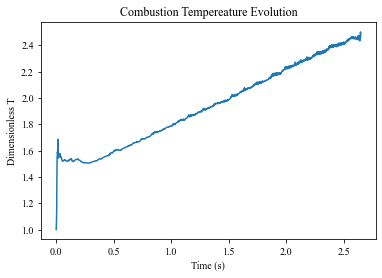

In [89]:
fig, ax = plt.subplots()
ax.plot(data["Time"],data["max"]/Tref)
ax.set_xlabel(f"Time (s)")
ax.set_ylabel(f"Dimensionless T")
ax.set_title(f"Combustion Tempereature Evolution")
# ax.legend(loc="upper right")